# IS-02 Machine Learning - Data and Web Science
## Lecture 12: Clustering
## Project 11
### <i>Avgitidis Konstantinos</i>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
X, labels_true = make_blobs(10000,10,centers=4,shuffle=True)
X = StandardScaler().fit_transform(X)

In [3]:
try:
    df = pickle.load( open( "clust.p", "rb" ) )
except FileNotFoundError:
    algorithms = [
    DBSCAN(eps=1,min_samples=10,metric="euclidean").fit(X),
    DBSCAN(eps=1.5,min_samples=100,metric="manhattan").fit(X),
    DBSCAN(eps=2,min_samples=1000,metric="euclidean").fit(X),
    DBSCAN(eps=2.5,min_samples=5,metric="manhattan").fit(X),
    Birch(threshold=0.5,n_clusters=3).fit(X),
    Birch(threshold=0.3,branching_factor=100,n_clusters=3).fit(X),
    KMeans(n_clusters=2).fit(X),
    KMeans(n_clusters=3).fit(X),
    KMeans(n_clusters=4, n_init=100,max_iter=3000).fit(X),
    KMeans(n_clusters=5,n_init=100,max_iter=10000).fit(X),
    MiniBatchKMeans(n_clusters=3,init="k-means++").fit(X),
    MiniBatchKMeans(n_clusters=4,init="k-means++").fit(X),
    MiniBatchKMeans(n_clusters=5,init="k-means++").fit(X),
    SpectralClustering(n_clusters=3,eigen_solver="arpack",n_init=10,affinity="nearest_neighbors",n_neighbors=20,n_jobs=-1).fit(X),
    SpectralClustering(n_clusters=4,eigen_solver="lobpcg",n_init=1000,affinity="nearest_neighbors",n_neighbors=20,n_jobs=-1).fit(X),
    SpectralClustering(n_clusters=5,eigen_solver="arpack",n_init=100,affinity="rbf",n_jobs=-1).fit(X),
    ]

    models = []
    for i in algorithms:
        try:
            models.append([i,metrics.silhouette_score(X, i.labels_,"manhattan")])
            # print(f"Silhouette Coefficient for {i}: %0.3f"
            #     % metrics.silhouette_score(X, i.labels_,"manhattan"))
        except ValueError:
            pass
    df = pd.DataFrame(data=[[i[1] for i in models]],columns=[str(j[0]) for j in models])
    pickle.dump(df, open( "clust.p", "wb" ) )

In [4]:
df

,"DBSCAN(eps=1, min_samples=10)","DBSCAN(eps=1.5, metric='manhattan', min_samples=100)","DBSCAN(eps=2, min_samples=1000)","DBSCAN(eps=2.5, metric='manhattan')",Birch(),"Birch(branching_factor=100, threshold=0.3)",KMeans(n_clusters=2),KMeans(n_clusters=3),"KMeans(max_iter=3000, n_clusters=4, n_init=100)","KMeans(max_iter=10000, n_clusters=5, n_init=100)",MiniBatchKMeans(n_clusters=3),MiniBatchKMeans(n_clusters=4),MiniBatchKMeans(n_clusters=5),"SpectralClustering(affinity='nearest_neighbors', eigen_solver='arpack',\n n_clusters=3, n_jobs=-1, n_neighbors=20)","SpectralClustering(affinity='nearest_neighbors', eigen_solver='lobpcg',\n n_clusters=4, n_init=1000, n_jobs=-1, n_neighbors=20)","SpectralClustering(eigen_solver='arpack', n_clusters=5, n_init=100, n_jobs=-1)"
0,0.62868,0.432166,0.66814,0.62868,0.66814,0.66814,0.500187,0.66814,0.71379,0.572777,0.66814,0.71379,0.581963,0.563194,0.309609,0.572765


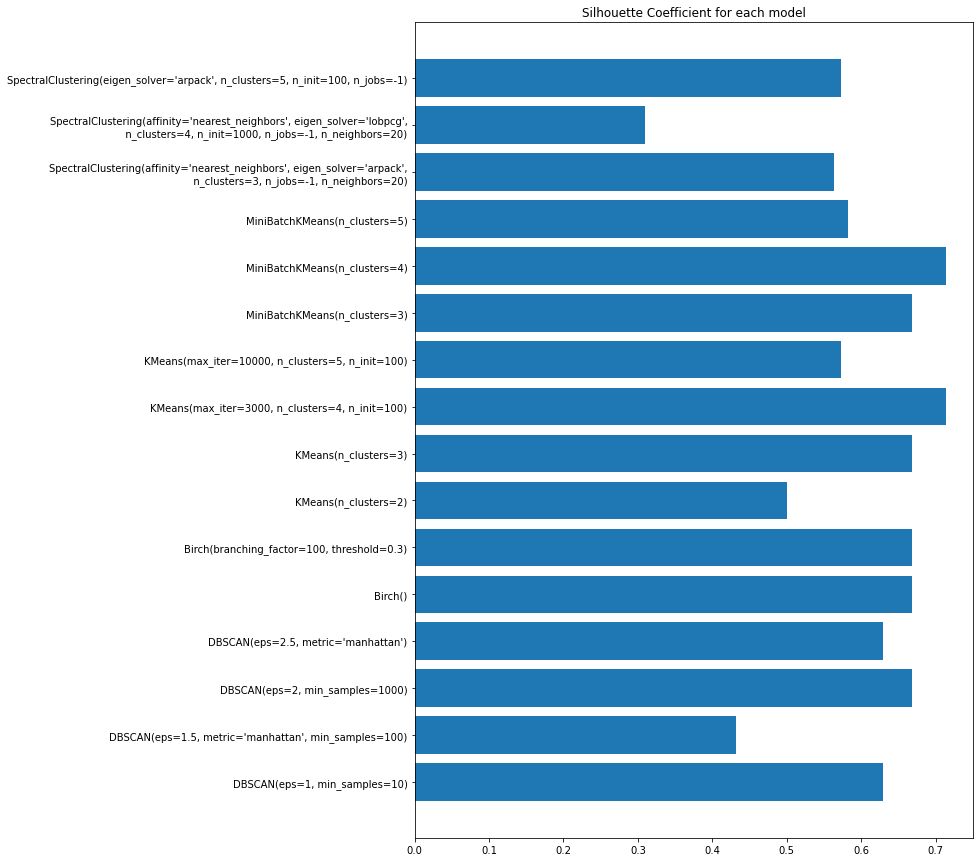

In [5]:
fig, ax = plt.subplots(figsize=(10,15))
plt.barh(df.columns,df.values[0])
plt.title("Silhouette Coefficient for each model")
plt.show()